# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for the MLA course

by [*lufer*](mailto:lufer@ipca.pt)

---



# ML Modelling - Part V-II - Classification Problems
\
**Contents**:

1.  **Create a Classification ML Model**
2.  **Linear SVC Algorithm**
3.  **Random Forest Classifier Algorithm**
4.  **Decison Trees Algorithm**
5.  **Logistic Regression Algoritm**



This notebook explores the creation of Machine Learning models for Classification Supervised Learning.

# Environment preparation


**Importing necessary Libraries**

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#import libraries for trainning
from sklearn.model_selection import train_test_split


**Mounting Drive**

In [2]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/



# Review of concepts


### Types od ML Algorithms

There is essentially four types of ML Algorithms:

*   Supervised ML Algorithms
*   Unsupervised ML Algorithms
*   Semi-Supervised ML Algorithms
*   Reinforcement ML Algorithms

###ML algorithms selection

The selection of ML can follow the next phases:

1.   **Understand Your Problem**

> Understanding clearly the problem to solve. What is the goal? What is the problem all about: classification, regression, clustering, or something else? What kind of data you to have to work with?

2.  **Process the Data**

> Ensure that your data is in the right format for your chosen algorithm. Process and prepare your data by Cleaning, Clustering, Regression.

3.  **Exploration of Data**

>  Conduct data analysis to gain insights into your data. Visualizations and statistics helps you to understand the relationships within your data.

4.  **Metrics Evaluation**

>  Decide on the metrics that will measure the success of model. You must choose the metric that should align with your problem.

5.  **Start wirh a simple model**

> One should begin with the simple easy-to-learn algorithms. For classification, try regression, decision tree. Simple model provides a baseline for comparison.

6.  **Use Multiple Algorithms**

> Multiple algorithms allow to check that one performs better than others, in the dataset

7.  **Hyperparameter Tuning**

> Grid Search and Random Search can helps with adjusting parameters choose algorithm that find best combination.

8.  **Cross-Validation**

> Using cross-validation allow to explores the performance of your models. It is relevant to preven overfiting or underfiting.

9.  **Comparing Results**

> Evaluate the models’s performance by using the metrics evaluation. Compare their performance and choose that best one that align with problem’s goal.

10.  **Consider Model Complexity**

> Balance complexity of model and their performance. Compare their performance and choose that one best algorithm to generalize better.



---
see more in books:
*   *Machine Learning*, Tom M. Mitchel
*   *Mastering Machine Learning with Python in Six Steps*, M
Manohar Swamynathan
---




# 1 - Choosing a ML Algorithm

Choose a Machine Learning algortihms depend of many factors, such as the size of the datatset, the type of the data in it, the goal of the model, and others.

Sklearn offers a graphical algorith that facilicates this selection.

![picture](https://scikit-learn.org/stable/_static/ml_map.png)

[go to...](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

Let's consider a Supervised Learning process, usign Regression Algorithms, where a number is intended to predict.

# 2 - Classification Problems


Let's consider now a Supervised Learning process to deal with problems which require the given data set to be classified in two or more categories. For example, whether a person is suffering from a disease X (answer in Yes or No). A typical Classification Problem.\

**Note:**
\
Classification problems are different than regression problems primarily in their outputs. Classification problems involve categorizing data into discrete classes or labels, such as “spam” or “not spam” in email filtering models. In contrast,regression problems predict continuous, numerical outputs, like orecasting sales or temperatures.

## 2.1 - Dataset Preparation



### *Download Dataset*

This dataset is prepared for Classification Analysis

\
see [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

\
**Attribute Information:**

*   `age`

*   `sex`
*   `chest pain` type (4 values)
*   `resting blood pressure`
*   `serum cholestoral` in mg/dl
*   `fasting blood sugar` > 120 mg/dl
*   `resting electrocardiographic results` (values 0,1,2)
*   `maximum heart rate` achieved
*   `exercise induced angina`
*   `oldpeak` = ST depression induced by exercise relative to rest
*   `the slope of the peak` exercise ST segment
*   `number of major vessels` (0-3) colored by flourosopy
*   `thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect

\
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values

In [3]:
#Importing a real world dataset preparaed for Regression

filePath='/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/'
hd = pd.read_csv(filePath+"heart-disease.csv")
pd.set_option("display.precision", 2)
#answer: a dictionary

In [ ]:
#hd.head(100)


We want to use Features to predict the target category (heart disease or not).

In [ ]:
len(hd)
#answer: more than 50

1025

### Understanding the Dataset

In [ ]:
#install pandas_profilin
#! pip uninstall pandas-profiling
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
##profile = ProfileReport(hd, title="Heart Diseases Dataset", html={'style' : {'full_width':True}})
#send result to file
##profile.to_file(output_file=filePath+"HeartDiseasesDataset.html")
# analyse HeartDiseasesDataset.html
#see https://www.geeksforgeeks.org/pandas-profiling-in-python/
#

## 2.2 - Linear SVC Algorithm


Because we have less than 100k of raw data, let's try to explore the **Linear SVC Classification Algoritm** (see [sklearn selection ML schema](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html#)).

\
*LinearSVC* (*Linear Support Vector Classification*)  are classes to performe binary and multi-class classification on a dataset.

LinearSVC uses the linear kernel `(SVC(kernel = 'linear'))`.

### Prepare X and y

In [ ]:
#import the Linear SVC model class
from sklearn.svm import LinearSVC

#setup randon seed
np.random.seed(42)

#prepare the data for splitting
X = hd.drop("target", axis=1)
y=hd["target"]

#split the datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [ ]:
plt.hist(y)

In [ ]:
y_train.head()

835    0
137    1
534    1
495    1
244    1
Name: target, dtype: int64

### Create instance of the model

In [ ]:
#instanciate the model
lsvc = LinearSVC(max_iter=1000) #when not converging, explore dual=False

#support vectors
#see https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html


### Fit the model

Once the model is created, you need to fit (or train) it. Model fitting is the process of determining the coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ that correspond to the best value of the cost function. You fit the model with .fit():

In [ ]:
#fit to train datatset
lsvc.fit(X_train, y_train)

LinearSVC()

### Make Predictions

There is two possibilities


*   using the `predict()` function
*   using the `predict_proba()` function





***Predicting using `predict()`***

In [ ]:
#To simplify, apply only to the first 5 records.
#y_predicted_rfa=model.predict(X_test[:5])

#all records
y_predicted_lsv=lsvc.predict(X_test)
y_predicted_lsv[:5]
#len(y_predicted_lsv)

array([1, 1, 0, 1, 0])

***Predicting using `predict_proba()`***


`predict_proba()` returns probabilities of a calssification model.

* *predict_proba* returns a certainty score for the prediction. The output of predict_proba is an array with the first element being an estimate of the probability that the instance is a 0 class (or False class), and the second element being an estimate of the probability that the instance is a 1 class (or True class)

* *predict_proba* ia method to predict the probability of an event using **logistic regression**.


In [ ]:

#LSVCA
#LSVC doesn't has predict_proba()
#use CalibrateClassifierCV to calibrate the probabilites
from sklearn.calibration import CalibratedClassifierCV
clf_aux = CalibratedClassifierCV(lsvc)
clf_aux.fit(X_train, y_train)

#all records
y_predicted_lsvca = clf_aux.predict_proba(X_test)

#To simplify, only the first 5 records are explored.
#y_predicted_lsvca=clf_aux.predict_proba(X_test[:5])
y_predicted_lsvca[:5]

array([[0.07278552, 0.92721448],
       [0.02321886, 0.97678114],
       [0.93195371, 0.06804629],
       [0.10133074, 0.89866926],
       [0.90936232, 0.09063768]])

In [ ]:
#compare predicted probability
#To simplify, only the first 5 records are explored.
#dDiffP = pd.DataFrame({"Truth":y_test[:5], "Probability":y_predictedProba[:,1]})
#all records
dDiffP = pd.DataFrame({"Truth":y_test, "Predicted": y_predicted_lsv, "Probability":y_predicted_lsvca[:,1]})
dDiffP.head()

,Truth,Predicted,Probability
527,1,1,0.93
359,1,1,0.98
447,0,0,0.07
31,1,1,0.90
621,0,0,0.09


### *Accuracy*

Evaluate the model using the *scoring method* `score()`. it  returns the mean accuracy on the given test data and labels (truth).

In [ ]:
#Evaluate the LinearSVC (on test dataset)
lsvc.score(X_test,y_test)

0.7951219512195122

In [ ]:
# Compare predictions  to truth labels
y_predicted = lsvc.predict(X_test)
np.mean(y_predicted==y_test)
#note: what that means? it is the same as score()!!!

0.7951219512195122

In [ ]:
#hd['target'].value_counts()

The score is interesting because we only have two classes (binary classification) to predict. However can it be improved?

Since we are working with test data, Let's try with "Ensemble methods", such as Random Forrest Algorithm.

## **2.3 - Random Forest Classifier Algorithm**

The *Random Forest Classifier Algorithm* is an Ensemble method

### `Prepare, Split and Fit`

In [34]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#set random see
np.random.seed(42)

#Create X and y data
X = hd.drop('target', axis=1)
y = hd['target']

#Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create a Randon Forest Classifier Model instance
rf = RandomForestClassifier(n_estimators=100)       #by default it uses "n_estimators=100" decisions tress

#fit the model to the train data (training the machine learning algorithm - find patterns)
rf.fit(X_train,y_train)

RandomForestClassifier()

### Analyse the data better

Let's have a new perpective from the datasets!

In [ ]:
#just check if there are null values in the Train data
X_train.isnull().sum()
#answer: no null values

In [ ]:
#just check if there are null values in the test data
X_test.isnull().sum()
#answer: no null values

In [ ]:
hd.head()

***Ckeck the distribution of original target values***

In [9]:
import collections
from collections import Counter
counter = Counter(hd.target)

for k,v in counter.items():
  per = v/len(hd.target)*100
  print("Class=%s Count=%d, Percentage=%.3f%%" % (k,v,per))

Class=0 Count=499, Percentage=48.683%
Class=1 Count=526, Percentage=51.317%


In [ ]:
#counter.items()

***Graphicaly***

In [ ]:
sns.displot(hd.target, height=4)

### Make Predictions

***Predicting using `predict()`***

In [38]:
#To simplify, only the first 5 records are explored.
#y_predicted_rfa=model.predict(X_test[:5])

#all records
y_predicted_rfa=rf.predict(X_test)
y_predicted_rfa
#len(y_predicted_lra)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

*Analysing the truth values*

In [ ]:
np.array(y_test)

*Comparing Truth and Predicted*

In [13]:
#only the first 5 records
#dDiff = pd.DataFrame({"Truth":y_test[:5], "Predicted":y_predicted_rfa })
#all records
dDiff = pd.DataFrame({"Truth":y_test, "Predicted":y_predicted_rfa })
dDiff.head()

,Truth,Predicted
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0


***Predicting using `predict_proba()`***

In [14]:
#To simplify, only the first 5 records are explored.
#y_predictedProba=model.predict_proba(X_test[:5])

#all records
y_predictedProba=rf.predict_proba(X_test)
#y_predictedProba
#what this means?

*Comparing Truth and Predicted Probabilities*

In [15]:
#compare predicted probability
#To simplify, only the first 5 records are explored.
#dDiffP = pd.DataFrame({"Truth":y_test[:5], "Probability":y_predictedProba[:,1]})
#all records
dDiffP = pd.DataFrame({"Truth":y_test, "Probability":y_predictedProba[:,1]})
dDiffP.head()

,Truth,Probability
527,1,1.00
359,1,0.87
447,0,0.00
31,1,1.00
621,0,0.01


In [19]:
y_predictedProba[:5]

array([[0.  , 1.  ],
       [0.13, 0.87],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01]])


---
\
**Comparing `predict()` with `predict_proba()`**:

The first number of the array represents the probalility to be the expected label. The second, de probalility to not be!

`pridict_proba()`\
`[0., 1.]`

it means that there is 0% of probability to be "0". Thus it is 1;

`[0.13, 0.87]`

it means that there is 0.13% of probability to be "0" and .87% to be 1;


\
**Conclusion**: the more value of second (probability) number, the more confident model is.

### *Accuracy*

Evaluate the model using the *score method* `score()`

In [37]:
#Evaluate the model: check the score on the test data (use the patterns the model has learned)
rf.score(X_test,y_test)

#answer: better Coefficient of Determination!!!

0.9853658536585366

**Remarks:**

1.   If we deal with structured data, use Ensemble Models. It is great to find patterns!
2.   If we deal with unstructured data, use deep learning or transfer learning models (to be explored later).



In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted_rfa)

0.9853658536585366

In [ ]:
#X_test.head()
y_predicted_rfa

In [42]:
from sklearn.metrics import f1_score
print('Test Set Evaluation F1-Score=>',f1_score(y_test,y_predicted_rfa))

Test Set Evaluation F1-Score=> 0.9852216748768473


## 2.4 - Decison Tree

see
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

### Prepare the Data

In [64]:

#set random see
np.random.seed(42)

#Create X and y data
X = hd.drop('target', axis=1)
y = hd['target']

#Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42, shuffle=True)

In [82]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### Create instance and the model

In [78]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
#dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Predicting

In [ ]:
#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)
y_pred_dt

Evaluating

In [80]:
# Evaluation on Training set
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_dt))

print('F1-Score=>',f1_score(y_test,y_pred_dt))

Accuracy: 0.7902439024390244
F1-Score=> 0.8138528138528138


Worst than RandomForest?

### Comparing RandomForest and Decision Tree Algorithms

In [88]:
 rf_f1 = f1_score(y_test,y_predicted_rfa)

 dt_f1 = f1_score(y_test,y_pred_dt)

 rf_f1,dt_f1


(0.9852216748768473, 0.8138528138528138)

RandomForest get better prediction!

In [87]:
dDiffP = pd.DataFrame({"Truth":y_test, "Probability":y_predictedProba[:,1]})
dDiffP.head()

,Truth,Probability
527,1,1.00
359,1,0.87
447,0,0.00
31,1,1.00
621,0,0.01


Visualizing Decision Tree

In [84]:
#Find code for that!!!

**Preserve the final result**

In [ ]:
#preserve the result
filePath="/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/"
dDiffP.to_csv(filePath+"ddiffProba.csv", index=False)

## 2.5 - Logistic Regression Algoritm

Despite its name, it is implemented as a linear model for classification rather than regression.

* Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (binary outcome). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables

* Logistic Regression works by using the [logistic function](https://en.wikipedia.org/wiki/Logistic_function)  to model the probability of the binary outcome as a function of the independent variables. The logistic function, also known as the sigmoid function, maps the input to a value between 0 and 1, representing the probability of the positive outcome.

see more about *Logistic Regression* in:  https://realpython.com/logistic-regression-python/

### Download Dataset

In [22]:
#Importing a real world dataset preparaed for Regression

filePath='/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/'
hd = pd.read_csv(filePath+"heart-disease.csv")
pd.set_option("display.precision", 2)
#answer: a dictionary

In [ ]:
hd.head(100)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
96,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
97,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


### Prepare X and y

In [23]:
#prepare the data for splitting
X = hd.drop("target", axis=1)
y=hd["target"]

#split the datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [24]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#using the same X_train, y_train, etc...otherwise, split again!

# create a logistic regression model
log_reg = LogisticRegression(solver='liblinear') # solver options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
#see https://realpython.com/logistic-regression-python/


### Fit to data

In [25]:
model=log_reg.fit(X_train, y_train)

More details about the model

In [ ]:
#more details about the model
# array of distinct values that y takes
model.classes_

#get the value of the slope 𝑏₁
model.coef_       # 𝑏₀ is given inside a one-dimensional array

#the intercept 𝑏₀ of the linear function 𝑓
model.intercept_  # 𝑏₁ is inside a two-dimensional array


array([0.90307032])

### Predicting

In [28]:

# Test the logistic regression model
y_pred = log_reg.predict(X_test)

p_pred=log_reg.predict_proba(X_test)

#define the number format for all columns
#see https://kiwidamien.github.io/stylish-pandas.html

pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame({"Truth": y_test, "Predict":y_pred, "Predict Proba":p_pred[:,1]}).head(5)

,Truth,Predict,Predict Proba
558,1,1,1.00
702,1,1,0.83
533,1,1,0.91
559,0,0,0.12
408,1,1,0.63


### Accuracy



```
accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
```


*accuracy_score* returns:

*   if `normalize=True` returns the fraction of correctly classified samples
*   if `normalize=False`, returns the number of correctly classified

In [31]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.83415


In [ ]:
accuracy = accuracy_score(y_test, y_pred, normalize=False)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 171.000


In [30]:
model.score(X_test,y_test)

0.8341463414634146

## 2.6 - Evaluating the Classification model
The goal is to compare the predicted with the actual values (Truth)

Remember that, to evaluate the quality of the predictions, it can be used:

*   Estimator score method
*   Scoring Parameter
*   Metric Functions

\
see https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


### Classification Performance Metrics

Classification Problems have as performance metrics:

*    [Precision](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=pt-br)
*    [Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=pt-br)
*    [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy?hl=pt-br)
*    [F1 Score](https://en.wikipedia.org/wiki/F-score)
*    [See more metrics in...](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

\
see examples in [Accuracy, Precision, Recall & F1-Score – Python Examples](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/)

### **"Accuracy" classification score**

The idea is to compare predictions  to the truth  labels.
In previous explored algorithms (Linear SVC Algorithm, Logistic Regression Algorithm and Random Forest Classifier) we got the following accuracies:

In [ ]:
#LSVCA
#LSVC doesn't has predict_proba()
#use CalibrateClassifierCV to calibrate the probabilites
from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV(lsvc)
clf.fit(X_train, y_train)

y_predicted_lsvca = clf.predict_proba(X_test)

#RFCA
y_predicted_rfca=rf.predict_proba(X_test)

#LRA
y_predicted_lra = log_reg.predict_proba(X_test)

Comparing results with the truth values:

In [ ]:
result = pd.DataFrame({"Truth":y_test, "Predicted_LSVC":y_predicted_lsvca[:,1], "Predicted_RFC":y_predicted_rfca[:,1], "Predicted_LR":y_predicted_lra[:,1]})
result.head(10)

,Truth,Predicted_LSVC,Predicted_RFC,Predicted_LR
558,1,0.99,0.98,1.00
702,1,0.74,0.99,0.83
533,1,0.85,1.00,0.91
559,0,0.21,0.03,0.12
408,1,0.60,0.98,0.63
247,0,0.01,0.00,0.01
616,1,0.62,0.92,0.63
943,1,0.53,0.91,0.53
47,0,0.12,0.01,0.12
773,0,0.03,0.00,0.03


### Using Scoring parameters

**Differents ways to calculate scores**

In [ ]:
# it is equal to the score value (acccuracy)
# it was used previously in tis notebook
rf.score(X_test, y_test)

#model.score(X_train, y_train)
#what happens? Why?

0.9853658536585366

In [ ]:
#Another way to get the same
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted_rfa, normalize=False)        ## normalize=False...returns quantity

202

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_predicted_rfa)) ## normalize=trye...returns percentages


Accuracy: 0.507


**Scoring parameter** are model-evaluation tools that uses *cross-validation* (such as `model_selection.cross_val_score` and `model_selection.GridSearchCV`)

The`cross_val_score` model evaluates a score by cross-validation, provides cross-validated accuracy scores. This model trains and tests over multiple folds of the dataset

*cross_val_score* is used as a simple cross validation technique to prevent over-fitting and promote model generalisation.

\
see more about: [cross-val-model](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)

In [ ]:
# just to be sure, instanciate again the estimator
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#set random see
np.random.seed(42)

#Create X and y data
X = hd.drop('target', axis=1)
y = hd['target']

#Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create a Randon Forest Classifier Model instance
rf = RandomForestClassifier(n_estimators=100)       #by default it uses "n_estimators=100" decisions tress

#fit the model to the train data (training the machine learning algorithm - find patterns)
rf.fit(X_train,y_train)


RandomForestClassifier()

Analyse the estimator score

In [ ]:
# score() returns the mean accuracy on the given test data and labels.
rf.score(X_test,y_test)
#return a numer

0.9853658536585366

*Cross-Validation*

In [ ]:
#apply cros_validation_score
%%time
from sklearn.model_selection import cross_val_score

#cv=5  - 5 dataset folds

cross_val_score(rf,X,y, cv=5)
#returns an array

CPU times: user 1.46 s, sys: 0 ns, total: 1.46 s
Wall time: 1.52 s


array([1.        , 1.        , 1.        , 1.        , 0.98536585])

In [ ]:
#more folds?
#cross_val_score(model,X,y, cv=10)
#what happens?

It is important to select the best performance/cv numbers

In [ ]:
#sinlge training and test spli score
#score() returns the mean accuracy on the given test data and labels.
model_single_score = rf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation
model_cros_val_score = np.mean(cross_val_score(rf,X,y, cv=5))

#compare the two
model_single_score,model_cros_val_score
#waht happens?

(0.9853658536585366, 0.9970731707317073)

In [ ]:
print(f"Heart Disiease Classifier Accuracy:{model_single_score*100:.2f}%")

Heart Disiease Classifier Accuracy:98.54%


In [ ]:
print(f"Heart Disease Classifier Cross-Validateed Accuracy:print(f"MAE:{mean_absolute_error(y_test,y_preds):.2f}")
}%")

Heart Disease Classifier Cross-Validateed Accuracy:99.71%


The performance of cross-validation model is a litle better!


In [ ]:
# default scoring parameter of classifier  = mean accuracy
rf.score(X_test,y_test)

In [ ]:
# Scoring parameter set no None, by default
cross_val_score(rf,X,y, cv=5,scoring=None)

array([1.        , 1.        , 0.98536585, 1.        , 0.98536585])

In [ ]:
np.mean(cross_val_score(rf,X,y, cv=5,scoring=None))

0.9970731707317073

### Other Scoring Parameters

[see more in ](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

`scoring` parameter controls what metric is applied to the evaluated model

Examples: `max_error`, `r2`,`neg_mean_absolute_error`

* functions ending with *_score* return a value to maximize, the higher the better.

* functions ending with *_error* or *_loss* return a value to minimize, the lower the better.

### Metrics ROC / AUC
\
**Classification model evalution Metrics**


*   Accuracy (explored above!)
*   Area under ROC curve
*    Confusion Matrix
*    Classification Report

**ROC Curve**

A ROC curve (*Receiver Operating Characteristic Curve*) is a graph that shows the performance of a classification model at all classification thresholds

ROC curves are comparision of model's **true positive rate (tpr)** versus **false positives rate (fpr)**

1.   *True positives*: model predicts 1 and truth is 1
2.   *False positives*: model predcts 1 and truth is 0
3.   *True negatives*: model predicts 0 and truth is 0
4.   *False negatives*: model predicts 0 and truth is 1



In [ ]:
from sklearn.metrics import roc_curve

#make predictions with probabilities
y_predict_prob = rf.predict_proba(X_test)
y_predict_prob[:10]

array([[0.  , 1.  ],
       [0.13, 0.87],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.04, 0.96],
       [1.  , 0.  ]])



---

Arrays Review

In [ ]:
#arrays review
len(y_predict_prob), len(y_predict_prob[0]), y_predict_prob.size, y_predict_prob.shape

(205, 2, 410, (205, 2))

In [ ]:
row,col=y_predict_prob.shape
print(f"Rows: {row}")
print(f"Cols: {col}")

Rows: 205
Cols: 2


In [ ]:
y_predict_prob[:,0].size, y_predict_prob[:,1].size

(205, 205)



---



**Get the positives probabilites**

Positives probabilites are the second column values of `predict_proba()` array.

[see more about this...](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=pt-br)

In [ ]:
y_predict_positives = y_predict_prob[:,1]
#y_test.size

205

**Calculate de fpr, tpr and threshold**

In [ ]:
#Calculate de fpr, tpr and Threshold
fpr, tpr, threshold = roc_curve(y_test,y_predict_positives)

*Check fpr (False Positive Rate)*

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02941176,
       0.04901961, 0.07843137, 0.1372549 , 0.14705882, 0.19607843,
       0.2254902 , 0.26470588, 0.29411765, 0.35294118, 0.45098039,
       0.52941176, 0.68627451, 1.        ])

*Thresholds*

The minimun thresholds means the fpr and tpr don't overlap. This is an ideal situation, and means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.



In [ ]:
threshold

array([2.  , 1.  , 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.87,
       0.86, 0.82, 0.45, 0.23, 0.21, 0.2 , 0.12, 0.11, 0.09, 0.08, 0.06,
       0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

In [ ]:
tpr

array([0.        , 0.23300971, 0.38834951, 0.47572816, 0.54368932,
       0.62135922, 0.66019417, 0.70873786, 0.76699029, 0.7961165 ,
       0.91262136, 0.95145631, 0.97087379, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

**Plot a ROC curve**

The ROC curve is plotted with *tpr* against the *fpr* where *tpr* is on the y-axis and *fpr* is on the x-axis.

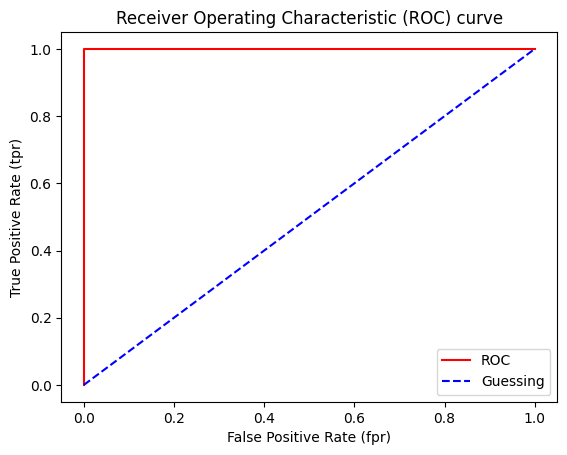

In [ ]:
# Create a function to plot a ROC curve
import matplotlib .pyplot as plt

#function receive false positve rates (fpr) and tru positive rate (tpr)
def plot_roc_curve (fpr, trp):
  #plot roc curve
  plt.plot(fpr,tpr,color="red", label="ROC")
  #plot a reference line wwith no predictive power
  plt.plot([0,1],[0,1],color="blue", label="Guessing", linestyle="--")

  #customize the plot
  plt.xlabel("False Positive Rate (fpr)")
  plt.ylabel("True Positive Rate (tpr)")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend()
  plt.show

#plot the curve
plot_roc_curve(fpr,tpr)

It looks a perfect model! However it is now always like that. The typical ROC curce looks like:

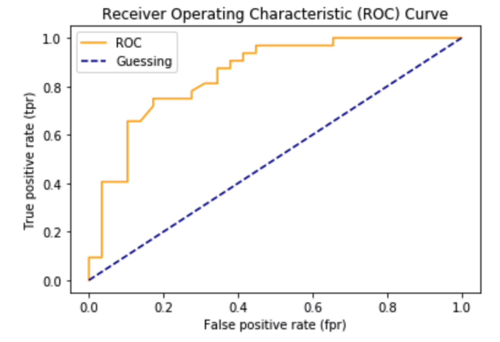

In [ ]:
from PIL import Image

img = Image.open('/content/gDrive/MyDrive/MIA/ColabNotebooks/Images/RocCurve.png')
img.thumbnail((500,500))
display(img)



**AUC-ROC (Area under the curve)**

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

It is also written as **AUROC** (Area Under the Receiver Operating Characteristics)

[see more about this...](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_predict_positives)
#answer: a perfect model, indeed!

1.0



---



**Remember:**

The maximun of AUC is 1...it is a perfect model.

Perfect ROC curve

In [ ]:
# plot a perfect ROC curve and AUC score
fpr, tpr, tresholds = roc_curve(y_test,y_test)

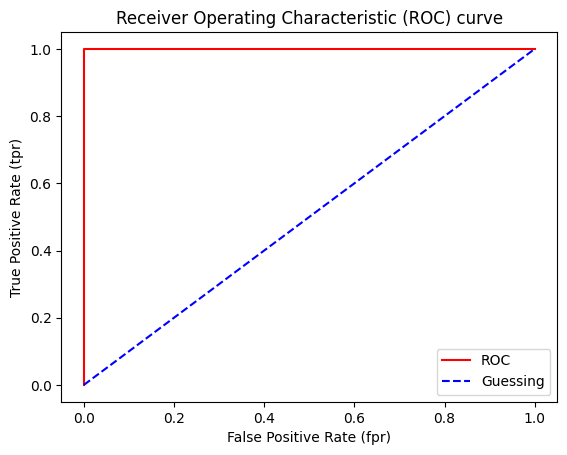

In [ ]:
plot_roc_curve(fpr,tpr)

Perfect AUC

In [ ]:
#perfect AUC score
roc_auc_score(y_test,y_test)

1.0



---



### Confusion Matrix

Another way to evaluate a classifiction model is by using `Confusion Matrix.

Confusion Matrix facilitates the comparison between the model predicted values and the expected values.

[see more about...](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_preds)

*Confusion Matrix Visualization*

[see more about display objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py)

\
**Using a pandas crosstab**

In [ ]:
#pd.crosstab(y_test,y_preds)
pd.crosstab(y_test,y_preds, rownames=["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,102,0
1,3,100


**Using Scikit-learning**

In [ ]:
# see the estimator type
#rf

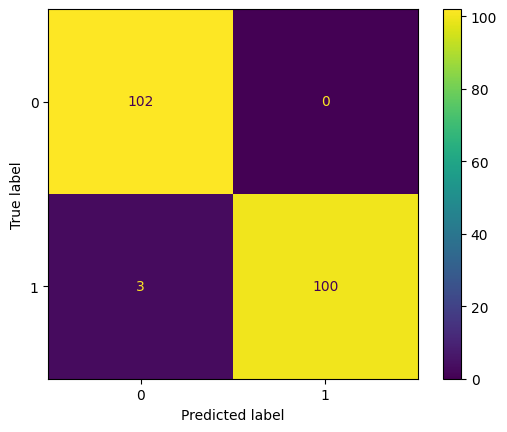

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#passing the existing confusion-matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()

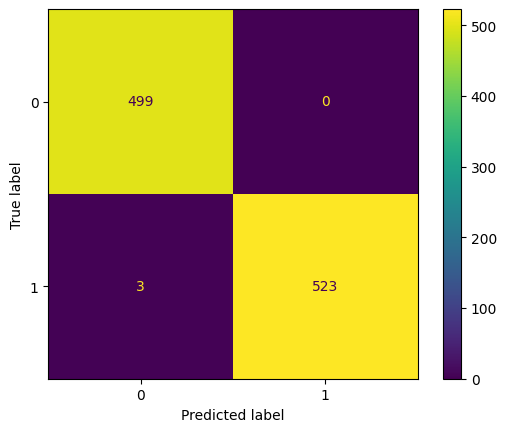

In [ ]:

#or
#passing the estimator (all)
ConfusionMatrixDisplay.from_estimator(estimator=rf,X=X,y=y)

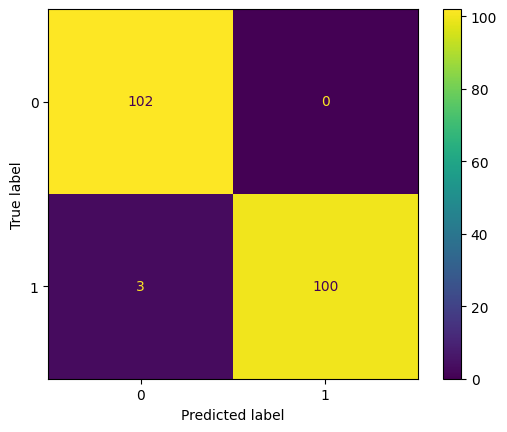

In [ ]:
#or
#Passing the predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

In [ ]:
#X_test


In [ ]:
#len(X_test)

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Another Representation of Classification Diagram**

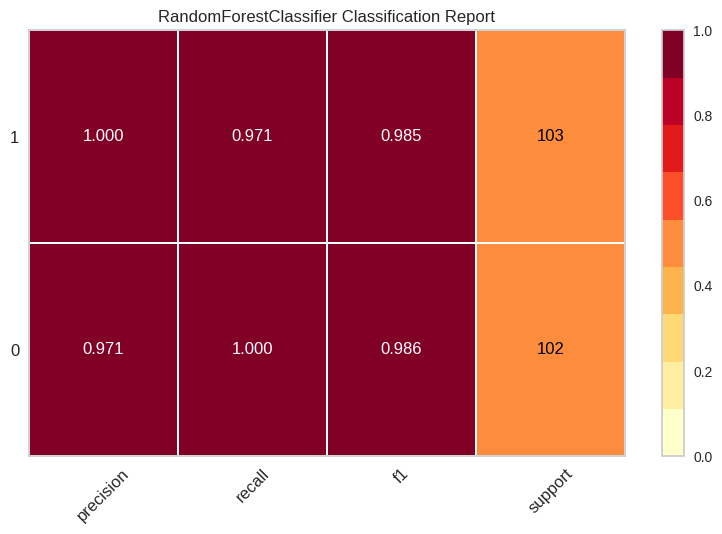

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf, classes=rf.classes_, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure
#see more in https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

**Remember:**

The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem

**Precision** can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

**Recall** is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

**F1 score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**Support** is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

### Precision

```
# Precision Score = True Positives/ (False Positives + True Positives)
```



In [ ]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_preds))

Precision: 1.000


### F1-Score

If you use F1 score to compare several models, **the model with the highest F1 score represents the model that is best able to classify observations into classes**.



```
# F1 Score is calculated as:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

where:

- Precision: Correct positive predictions relative to total positive predictions
- Recall: Correct positive predictions relative to total actual positives
```

[see more...](https://www.statology.org/f1-score-in-python/)

In [ ]:
from sklearn.metrics import f1_score

#calculate F1 score
f1_score(y_test, y_preds)

0.9852216748768473

### Recall | Sensitivity

Recall is also known as sensitivity or the true positive rate.


```
# Recall Score = True Positives / (False Negatives + True Positives)
```



In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_preds))

Recall: 0.971


### Error Rate

The error rate is the opposite of accuracy, which is the proportion of incorrect predictions. Error rate tells you how often your model makes a mistake, regardless of the label


<div><img src="https://classeval.files.wordpress.com/2015/06/error-rate.png?w=880" width="50%">
</img>

(https://classeval.files.wordpress.com/2015/06/error-rate.png?w=880")



In [ ]:
#
accuracy = accuracy_score(y_test, y_preds)

accuracy

0.9853658536585366

In [ ]:
#
error_rate = 1 - accuracy
error_rate
print(f"Error Rate:{(error_rate):.3f}%")


Error Rate:0.015%


### Accuracy and Precision Dilema

**A great accuracy does mot necessarily means success!**

Lets analyse the folowing controverse  example

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#when precision and recall  become valuable

disease_good= np.zeros(10000)    #array of 10000 zeros
#disease_good
#supose only one value of the array is 1
disease_good[0]=1               #only one positive case

#supose predictions
disease_preds=np.zeros(10000)    #model predicts every case as 0

#pd.set_option("display.precision", 2)
print(classification_report(disease_preds,
                            disease_good,
                            target_names=["Zero (0)","One (1)"],
                            digits=2))


              precision    recall  f1-score   support

    Zero (0)       1.00      1.00      1.00     10000
     One (1)       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
pd.DataFrame(classification_report(disease_good,disease_preds,output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,1.0,0.0,1.0,0.5,1.0
recall,1.0,0.0,1.0,0.5,1.0
f1-score,1.0,0.0,1.0,0.5,1.0
support,9999.0,1.0,1.0,10000.0,10000.0


*Another Example*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
y_true = [0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 0, 0, 0, 0, 0, 0]
target_names = ['class 0', 'class 1']

#print(classification_report(y_true, y_pred, target_names=target_names))

pd.DataFrame(classification_report(y_true, y_pred, target_names=target_names,output_dict=True))


,class 0,class 1,accuracy,macro avg,weighted avg
precision,1.00,0.0,0.86,0.50,1.00
recall,0.86,0.0,0.86,0.43,0.86
f1-score,0.92,0.0,0.86,0.46,0.92
support,7.00,0.0,0.86,7.00,7.00


## Another Example: Diabetes

In [ ]:
#Importing a real world dataset prepared for Classifcation

filePath='/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/'
data= pd.read_csv(filePath+"pima-indians-diabetes.csv")
pd.set_option("display.precision", 2)
#answer: a dictionary

In [ ]:
data.info()

Set Define column names

In [ ]:
data = data.rename(index=str, columns={"6":"preg"})
data = data.rename(index=str, columns={"148":"gluco"})
data = data.rename(index=str, columns={"72":"bp"})
data = data.rename(index=str, columns={"35":"stinmm"})
data = data.rename(index=str, columns={"0":"insulin"})
data = data.rename(index=str, columns={"33.6":"mass"})
data =data.rename(index=str, columns={"0.627":"dpf"})
data = data.rename(index=str, columns={"50":"age"})
data = data.rename(index=str, columns={"1":"target"})

In [ ]:
data.head()

,preg,gluco,bp,stinmm,insulin,mass,dpf,age,target
0,1,85,66,29,0,26.6,0.35,31,0
1,8,183,64,0,0,23.3,0.67,32,1
2,1,89,66,23,94,28.1,0.17,21,0
3,0,137,40,35,168,43.1,2.29,33,1
4,5,116,74,0,0,25.6,0.20,30,0


Check Null Values

In [ ]:
#len(data)
#number of nulls, by column
data.isnull().sum()
#columns name with nulls
#data.columns[data.isnull().any()]
#answer: no null values

preg       0
gluco      0
bp         0
stinmm     0
insulin    0
mass       0
dpf        0
age        0
target     0
dtype: int64

Prepare the Dataset

In [ ]:
#divide dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Accuracy
from sklearn.model_selection import cross_val_score

#set random see
np.random.seed(42)

#Create X and y data
Xd = data.drop('target', axis=1)
yd = data['target']

#Split into Train and Test
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd,yd,test_size=0.2)

# Create a Randon Forest Classifier Model instance
model = RandomForestClassifier(n_estimators=100)       #by default it uses "n_estimators=100" decisions tress

#fit the model to the train data (training the machine learning algorithm - find patterns)
model.fit(Xd_train,yd_train)

RandomForestClassifier()

In [ ]:
len(Xd_test), len(Xd_train), len(Xd)

(154, 613, 767)

In [ ]:
yd_test.size

154

Ckeck accuracy

In [ ]:
# score() returns the mean accuracy on the given test data and labels.
model.score(Xd_test,yd_test)
#return a number

0.8116883116883117

In [ ]:
from sklearn.metrics import roc_curve

#make predictions with probabilities
yd_predict_prob = model.predict_proba(Xd_test)
yd_predict_prob[:10]

array([[0.72, 0.28],
       [0.73, 0.27],
       [0.93, 0.07],
       [0.78, 0.22],
       [0.86, 0.14],
       [0.93, 0.07],
       [0.9 , 0.1 ],
       [0.44, 0.56],
       [0.42, 0.58],
       [0.96, 0.04]])

In [ ]:
yd_predict_prob.shape

(154, 2)

**Get the positives probabilites**

Positives probabilites are the second column values of `predict_proba()` array.

[see more about this...](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=pt-br)

In [ ]:
yd_predict_positives = yd_predict_prob[:,1]
#first 10
y_predict_positives[:10]

array([1.  , 0.87, 0.  , 1.  , 0.01, 0.94, 0.02, 0.  , 0.96, 0.  ])

In [ ]:
len(yd_test)

154

In [ ]:
len(yd_predict_positives)
#yd_predict_positives.shape

154

**Calculate de fpr, tpr and threshold**

In [ ]:
#Calculate de fpr, tpr and Threshold
fpr, tpr, threshold = roc_curve(yd_test,yd_predict_positives)
#check the rates
#fpr
#tpr
#threshold

Plot the ROC curve


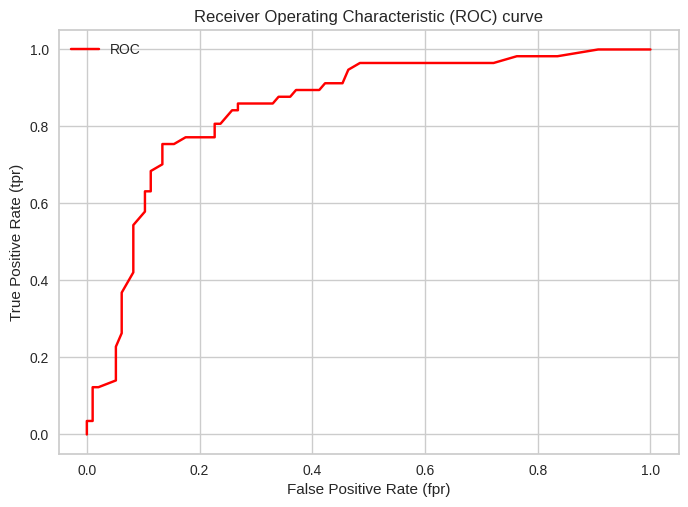

In [ ]:
# Create a function to plot a ROC curve
import matplotlib .pyplot as plt

#function receive false positve rates (fpr) and tru positive rate (tpr)
def plot_roc_curve (fpr, trp):
  #plot roc curve
  plt.plot(fpr,tpr,color="red", label="ROC")
  #plot a reference line wwith no predictive power
  #plt.plot([0,1],[0,1],color="blue", label="Guessing", linestyle="--")

  #customize the plot
  plt.xlabel("False Positive Rate (fpr)")
  plt.ylabel("True Positive Rate (tpr)")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend()
  plt.show

#plot the curve
plot_roc_curve(fpr,tpr)


AUC-ROC (Area under the curve)


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(yd_test,yd_predict_positives)

0.8510580575149214

*Plot ROC curve using sklearn*

[see](https://scikit-learn.org/stable/visualizations.html#visualizations)

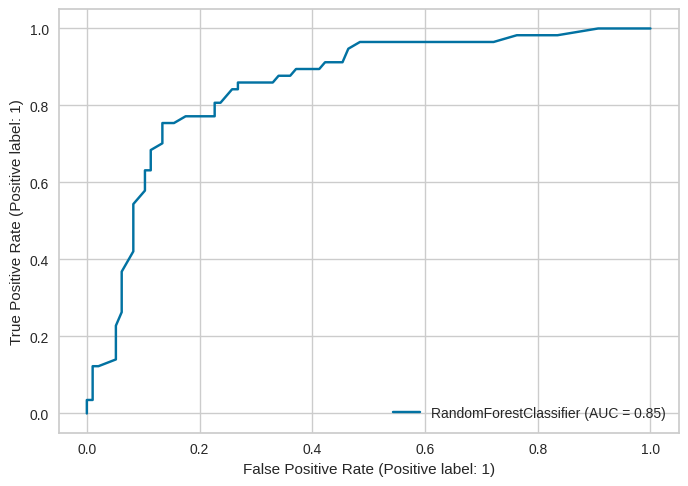

In [ ]:
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(model, Xd_test, yd_test)

**Explore Support Vector Classification Algotihm**

For large datasets consider using `LinearSVC`!!!

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(Xd_train, yd_train)

SVC(random_state=42)

In [ ]:
svc.score(Xd_test,yd_test), model.score(Xd_test,yd_test)

(0.7727272727272727, 0.8116883116883117)

*Comparing graphically both results*

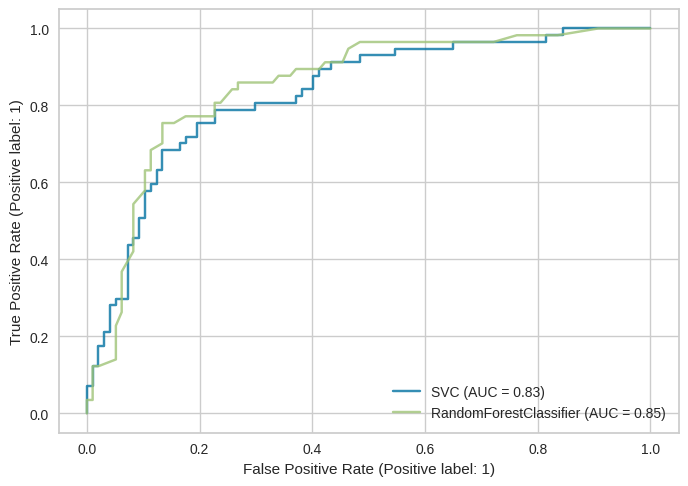

In [ ]:
#The plt.gca() function gets the current axes so that you can draw on it directly
ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(svc, Xd_test, yd_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)

# Evaluating Classification Models: summary

Lets apply all explored metrics briefly:

### 1- Load datatset

Data must be prepareed for classification (ex. Heart Disiease)

In [ ]:
#Importing a real world dataset preparaed for Regression

filePath='/content/gDrive/MyDrive/MIA/ColabNotebooks/Datasets/'
hd = pd.read_csv(filePath+"heart-disease.csv")
pd.set_option("display.precision", 2)
#answer: a dictionary

### 2 - Create Model

In [ ]:
#prepare the environment
#import metris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#import model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Create X and y
X=hd.drop("target",axis=1)
y = hd['target']

#Split data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42) # experiment with  stratify=y)

#Create model

model=RandomForestClassifier()  #n_estimators=100

#Fit model (features/labels)

model.fit(X_train,y_train)

# Make Predictions
y_preds= model.predict(X_test)

### 3 - Evaluate

In [ ]:
#Evaluate model using sklearn functions
print("Classification Metrics")
print(f"Accuracy: {accuracy_score(y_test,y_preds)}")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1-score: {f1_score(y_test,y_preds)}")


Classification Metrics
Accuracy: 0.9853658536585366
Precision:1.0
Recall: 0.970873786407767
F1-score: 0.9852216748768473


In [ ]:
#End!